In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

import numpy as np
from RetaredHarmonicDynamics import animate_particle
from matplotlib import animation
from scipy.stats import moment
from scipy.special import factorial, lambertw
from pathlib import Path

tensor = torch.tensor

from my_functions import get_pos, get_mean_std, FokkerPlankCalculator, time_delayed_harmonic, damped_harmonic_oszillator
from my_functions import get_approx_freq,get_zero,damped_harmonic,get_c1,get_c2,get_c3,get_c4,get_ham_damp_par


In [3]:
with_animations = False
pic_path = Path('Graphic_Results/')
save_run = False

## Delay

In [4]:
max_t = 5
num_particle = 10000
avarage = 100
xlim = (-3e-3,3e-3)
tau = 0.1

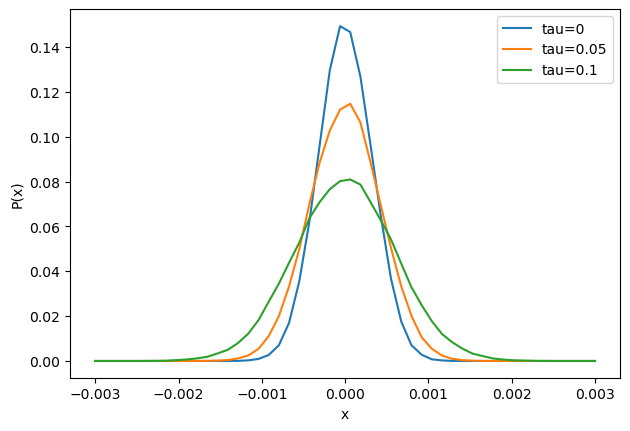

In [5]:
tau_hist ={}
for tau in [0,0.05,0.1]:
    pos = get_pos(num_particle = num_particle, max_t=max_t, tau=tau)
    tau_hist[tau] = pos[-avarage:,:,0].histc(bins=50, min=xlim[0], max=xlim[1])/num_particle/avarage

for tau,one_hist in tau_hist.items():
    plt.plot(np.linspace(*xlim,50),one_hist, label="tau="+str(tau))
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if save_run:
    plt.savefig(pic_path/"P_no_force.pdf")
plt.show()

In [6]:
# check different dt
if False:
    dt_hist ={}
    for dt in [0.25e-3,0.5e-3,1e-3,2e-3,5e-3]:
        pos = get_pos(num_particle = num_particle, max_t=max_t, tau=tau, dt=dt)
        dt_hist[dt] = pos[-avarage:,:,0].histc(bins=50, min=xlim[0], max=xlim[1])/num_particle/avarage

    for dt,one_hist in dt_hist.items():
        plt.plot(np.linspace(*xlim,50),one_hist, label=dt)
    plt.legend()

In [7]:
this_max_t = 1
dt = 3e-3
pos = get_pos(num_particle = num_particle, max_t = this_max_t, tau=tau,dt=dt)
if with_animations:
    borders = (-2e-3,2e-3)
    anim = animate_particle(x_data = lambda i: np.linspace(*borders,50),
                     y_data = lambda i: pos[i,:,0].histc(bins=50, min=borders[0], max=borders[1])/num_particle,
                     xlim=borders, ylim=(0.,0.15),
                      f=1, N=int(this_max_t/dt))
    display(anim)
    writergif = animation.PillowWriter(fps=30) 
    if save_run:
        anim.save(pic_path/f"Anim_no_force_tau_{tau}.gif", writer=writergif)

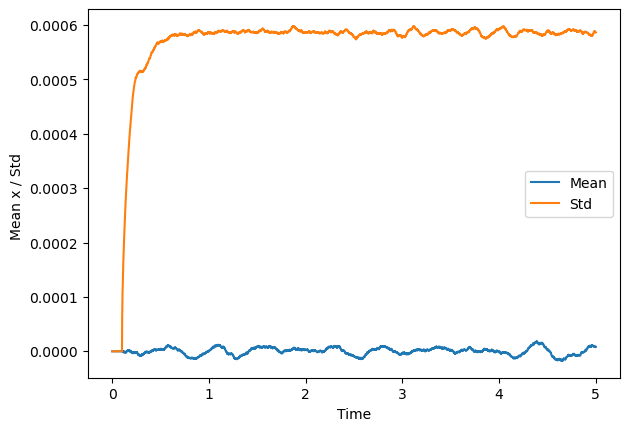

In [8]:
pos = get_pos(num_particle = num_particle, max_t=max_t, tau=tau)
mean = pos.mean(axis=-2)
std = pos.std(axis=-2)

plt.plot(np.linspace(0, max_t, len(mean)), mean, label="Mean")
plt.plot(np.linspace(0, max_t, len(std)), std, label='Std')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Mean x / Std ")
plt.tight_layout()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if save_run:
    plt.savefig(pic_path/"Mean_std_no_force.pdf")
plt.show()

## Constant Force

In [9]:
xlim = (-3e-3,3e-3)

In [10]:
statF_hist ={}
for stat_F in [0,0.5e-2,1e-2,2e-2]:
    pos = get_pos(num_particle = num_particle, max_t = max_t, tau=tau, F= lambda i: stat_F)
    statF_hist[stat_F] = pos[-avarage:,:,0].histc(bins=50, min=xlim[0], max=xlim[1])/num_particle/avarage

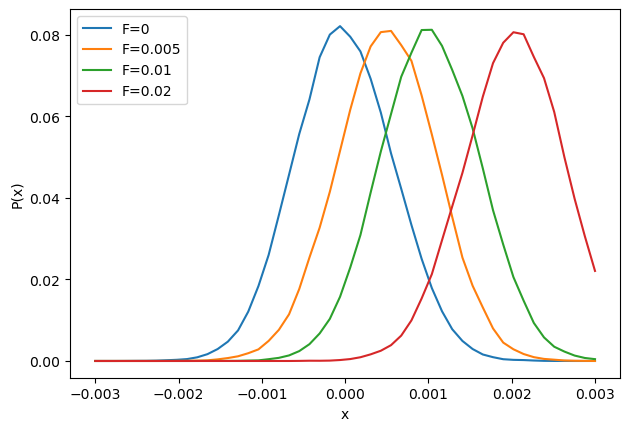

In [11]:
for statF,one_hist in statF_hist.items():
    plt.plot(np.linspace(*xlim,50),one_hist, label="F="+str(statF))
plt.legend()
#plt.text(-100,0.08, f"t={max_t}")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if save_run:
    plt.savefig(pic_path/"P_const_force.pdf")

In [12]:
if with_animations:
    F = 1e-2
    this_max_t = 5
    pos = get_pos(num_particle = num_particle,max_t=this_max_t, tau=tau, F= lambda i: F)
    anim = animate_particle(x_data = lambda i: np.linspace(*xlim,50),
                     y_data = lambda i: pos[i,:,0].histc(bins=50, min=xlim[0], max=xlim[1])/num_particle,
                     xlim=xlim, ylim=(0.,0.15),
                      f=1, N=int(this_max_t/dt))
    display(anim)
    writergif = animation.PillowWriter(fps=30) 
    
    if save_run:
        anim.save(pic_path/f"Anim_const_force_F_{F}_tau_{tau}.gif", writer=writergif)

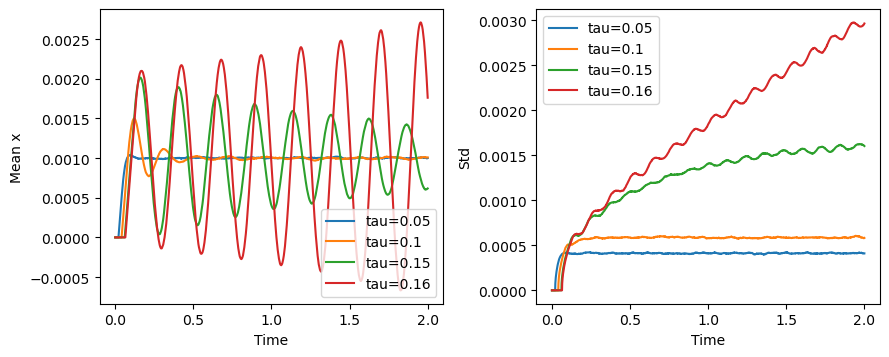

In [13]:
std =  {}
u_std = {}
mean = {}
u_mean = {}
this_max_t = 2
F = 1e-2
k = 10
for tau in [0.5e-1,1e-1,1.5e-1,1.6e-1]:
    mean[tau], u_mean[tau], std[tau], u_std[tau] = get_mean_std(tau,k, lambda i: F)




fig, axs = plt.subplots(1, 2, figsize=(9, 4))
for tau, one_mean in mean.items():
    axs[0].plot(np.linspace(0, this_max_t, len(one_mean)),one_mean, label="tau="+str(tau))
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Mean x")
axs[0].legend()

for tau, one_std in std.items():
    axs[1].plot(np.linspace(0, this_max_t, len(one_std)),one_std, label="tau="+str(tau))
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Std")
axs[1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
if save_run:
    plt.savefig(pic_path/'Mean_std_const_force.pdf')

## Force Ramp

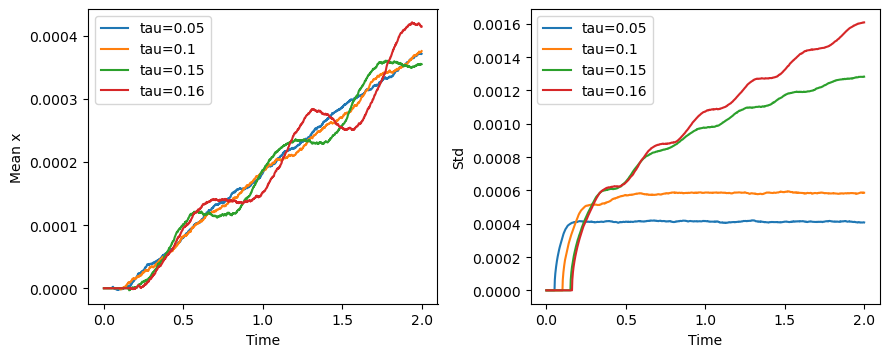

In [14]:
if True:
    std =  {}
    u_std = {}
    mean = {}
    u_mean = {}
    for tau in [0.5e-1,1e-1,1.5e-1,1.6e-1]:
        pos = get_pos(num_particle = num_particle, max_t = 2, tau=tau, F= lambda i: 0.01*i/(max_t))
        mean[tau] = pos.mean(axis=-2)
        std[tau] = pos.std(axis=-2)
        #mean[tau], u_mean[tau], std[tau], u_std[tau] = get_mean_std(tau,k, lambda i: 0.1*i/(max_t),)




    fig, axs = plt.subplots(1, 2, figsize=(9, 4))
    for tau, one_mean in mean.items():
        axs[0].plot(np.linspace(0, this_max_t, len(one_mean)),one_mean, label="tau="+str(tau))
    axs[0].legend()
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Mean x")

    for tau, one_std in std.items():
        axs[1].plot(np.linspace(0, this_max_t, len(one_std)), one_std, label="tau="+str(tau))
    axs[1].legend()
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("Std")
    # fig.suptitle(f'Constant Force F = 0.1*t/{max_t}')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save_run:
        plt.savefig(pic_path/'Mean_std_force_ramp.pdf')

## Oszillatory Force

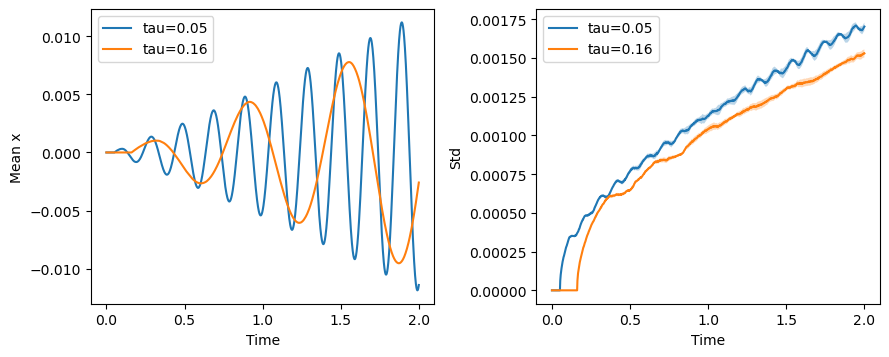

In [15]:
if True:
    std =  {}
    u_std = {}
    mean = {}
    u_mean = {}
    max_t=2
    for tau in [0.05,0.16]:
        k = np.pi/2 * 1/tau
        mean[tau], u_mean[tau], std[tau], u_std[tau] = get_mean_std(tau,k, lambda i: 0.01*np.cos(i * k),max_t=max_t)




    fig, axs = plt.subplots(1, 2, figsize=(9, 4))
    t_simu = np.linspace(0, max_t, len(mean[0.05]))
    for tau, one_mean in mean.items():
        axs[0].plot(t_simu,one_mean, label="tau="+str(tau))
    axs[0].legend()
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Mean x")

    for tau, one_std in std.items():
        one_u_std = u_std[tau]
        axs[1].plot(t_simu,one_std, label="tau="+str(tau))
        axs[1].fill_between(t_simu,one_std-one_u_std,one_std+one_u_std, alpha=0.3)
    axs[1].legend()
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("Std")
    # fig.suptitle(r'Critical oscillation with k = $\pi$/2 $\cdot$ 1/tau and F = 0.01 $\cdot$ cos(k $\cdot$ t)')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save_run:
        plt.savefig(pic_path/'Mean_std_crit_oscillation.pdf')

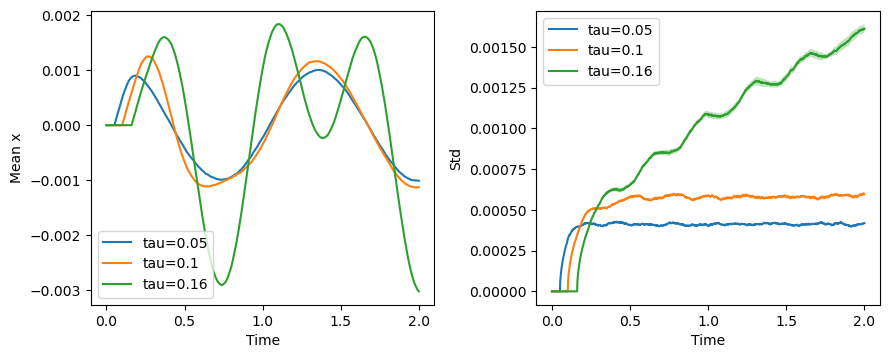

In [16]:
if True:
    std =  {}
    u_std = {}
    mean = {}
    u_mean = {}
    max_t=2
    for tau in [0.5e-1,1e-1,1.6e-1]:
        k = 10
        mean[tau], u_mean[tau], std[tau], u_std[tau] = get_mean_std(tau,k, lambda i: 0.01*np.cos(i * 5),max_t=max_t)




    fig, axs = plt.subplots(1, 2, figsize=(9, 4))
    t_simu = np.linspace(0, max_t, len(mean[0.05]))
    for tau, one_mean in mean.items():
        axs[0].plot(t_simu,one_mean, label="tau="+str(tau))
    axs[0].legend()
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Mean x")

    for tau, one_std in std.items():
        one_u_std = u_std[tau]
        axs[1].plot(t_simu,one_std, label="tau="+str(tau))
        axs[1].fill_between(t_simu,one_std-one_u_std,one_std+one_u_std, alpha=0.3)
    axs[1].legend()
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("Std")
    # fig.suptitle(r'Oscillation with F = 0.01 $\cdot$ cos(5 $\cdot$ t)')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save_run:
        plt.savefig(pic_path/'Mean_std_oscillation.pdf')

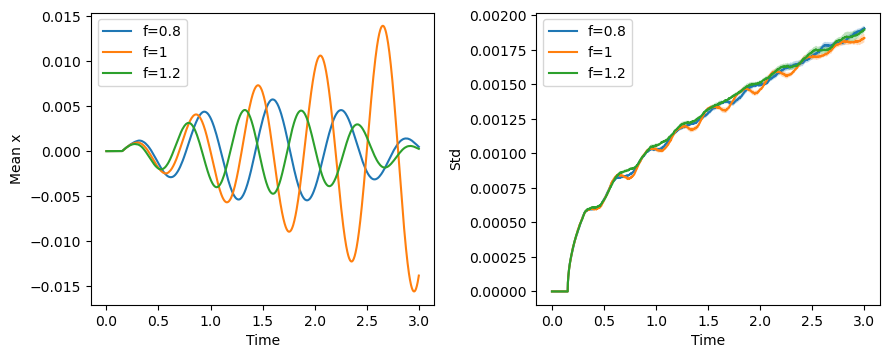

In [17]:
if True:
    F_std =  {}
    F_u_std = {}
    F_mean = {}
    F_u_mean = {}
    tau = 0.15
    max_t = 3
    for f_F in [0.8,1,1.2]:
        k = np.pi/2 * 1/tau
        pos = get_pos(num_particle = num_particle, max_t = max_t, tau=tau, F= lambda i: 0.01*np.cos(i * k * f_F), k=k)
        indx = np.linspace(0,len(pos),10,dtype=int)
        means = torch.cat([pos[:,i:j].mean(axis=-2) for i,j in zip(indx[:-1], indx[1:])], dim =1)
        F_mean[f_F] = means.mean(axis=1)
        F_u_mean[f_F] = means.std(axis=1)
        stds = torch.cat([pos[:,i:j].std(axis=-2) for i,j in zip(indx[:-1], indx[1:])], dim=1)
        F_std[f_F] = stds.mean(axis=1)
        F_u_std[f_F] = stds.std(axis=1)/np.sqrt(stds.shape[1])




    fig, axs = plt.subplots(1, 2, figsize=(9, 4))
    t_simu = np.linspace(0, max_t, len(pos))
    for f_F, one_mean in F_mean.items():
        axs[0].plot(t_simu,one_mean, label="f="+str(f_F))
        axs[0].set_xlabel("Time")
        axs[0].set_ylabel("Mean x")
    axs[0].legend()

    for f_F, one_std in F_std.items():
        one_u_std = F_u_std[f_F]
        axs[1].plot(t_simu,one_std, label="f="+str(f_F))
        axs[1].fill_between(t_simu,one_std-one_u_std,one_std+one_u_std, alpha=0.3)
        axs[1].set_xlabel("Time")
        axs[1].set_ylabel("Std")
    axs[1].legend()
    # fig.suptitle(r'Critical oscillation with k = $\pi$/2 $\cdot$ 1/tau and F = 0.1 $\cdot$ cos(f $\cdot$ k $\cdot$ t)')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save_run:
        plt.savefig(pic_path/'Mean_std_crit_oscillation_factor.pdf')

# Fokker Plank

In [18]:
my_fpc = FokkerPlankCalculator()

In [19]:
tau = 0.2
max_t = 3
k = 10 #np.pi/2 * 1/tau
D = 1e-6
dt = 4e-3
s = np.sqrt(2*D)

get_F = lambda i: 0.02*i
get_F = np.vectorize(get_F)

sim_mean, sim_u_mean, sim_std, sim_u_std = get_mean_std(tau,k, get_F,max_t=max_t, D=D, dt=dt)
ts,M_data, ts_,v,l_data, F_data = my_fpc.get_fp_mean_std(tau=tau, max_t=max_t, get_F=get_F,k=k, s=s)

In [20]:
# test the max_p
#for i in [5,10,15,20,30]:
#    x = np.linspace(0,max_t,1000)
#    y = l(k,tau,x, max_p = i)

#    plt.plot(x,y, label = i)
#    plt.ylim(-0.8,1.1)
#    plt.legend()

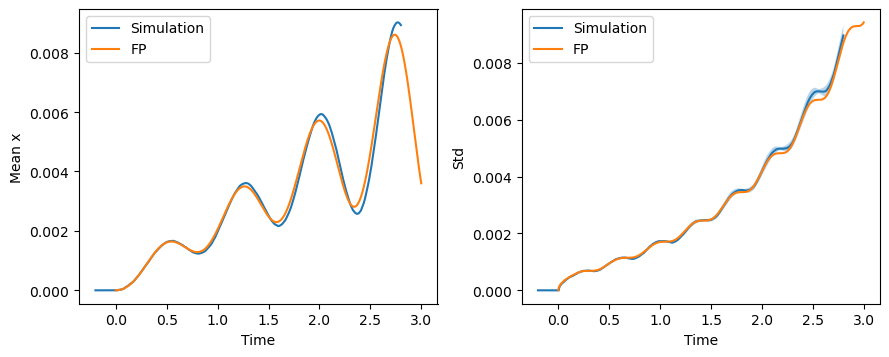

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
t_simu = np.linspace(0, max_t, len(sim_mean))

axs[0].plot(t_simu-tau,sim_mean, label='Simulation')
axs[0].set_ylim(*axs[0].set_ylim())
axs[0].plot(ts,M_data, label='FP')
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Mean x")
axs[0].legend()


axs[1].plot(t_simu-tau,sim_std, label='Simulation')
axs[1].fill_between(t_simu-tau,sim_std-sim_u_std,sim_std+sim_u_std, alpha=0.3)
axs[1].plot(ts, np.sqrt(v), label='FP')
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Std")
axs[1].legend()

# fig.suptitle(r'Compare FP solution to simulation')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
if save_run:
    plt.savefig(pic_path/'Mean_std_compare_FP.pdf')

c_k 0.0954929658551372 c_tau 0.15707963267948966 deltaT_0 0.3141592653589793


(-1.0999999571183567, 1.099999997958017)

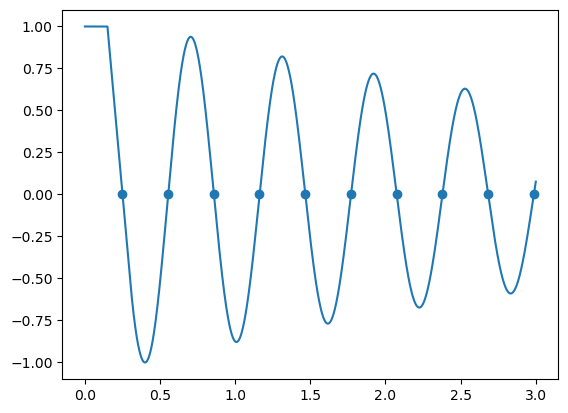

In [22]:
tau = 0.15
k = 10 #np.pi/2 * 1/tau

c_k = 1/(np.pi/2 * 1/tau)
c_tau = 1/k*np.pi/2
deltaT = np.pi/k
print("c_k",c_k,"c_tau", c_tau, "deltaT_0", deltaT)


max_t = 3





max_p = int(max_t/tau)+1
#print(max_p)

ts = np.linspace(0,max_t,6999)

l_data = my_fpc.l(k,tau,ts, max_p = max_p)
F_data = get_F(ts)

zeros = ts[l_data**2< 0.0001]
zeros = [zeros[0]]+[i for i,d in zip(zeros[1:], np.diff(zeros)) if d > 0.05]

plt.plot(ts, l_data)
#plt.plot(ts,F_data*10)
plt.scatter(zeros,[0]*len(zeros))
plt.ylim(*plt.ylim())
#plt.vlines(np.arange(0,max_t,tau),*plt.ylim(), alpha=0.4)

#l_2 = lambda t: 1 - k*(t-tau) + k**2/2*(t-2*tau)**2
#plt.plot(ts, l_2(ts))

In [23]:
np.diff(zeros), np.mean(np.diff(zeros))

(array([0.30437268, 0.30394398, 0.30394398, 0.30394398, 0.30437268,
        0.30394398, 0.30394398, 0.30394398, 0.30394398]),
 0.3040392493093265)

In [24]:
np.pi/get_approx_freq(tau,k)

0.3041438006426697

In [25]:
#zeros_a = [tau+1/k,
#           2*tau+1/k*(1-np.sqrt(2*tau*k-1)),
#           2*tau+1/k*(1+np.sqrt(2*tau*k-1))
#          ]
#zeros_a

# Compare damped driven oszillator

## Low freq approx

low
0.012500000000000002 0.5
0.5
high
0.025000000000000005 0.0
0.5


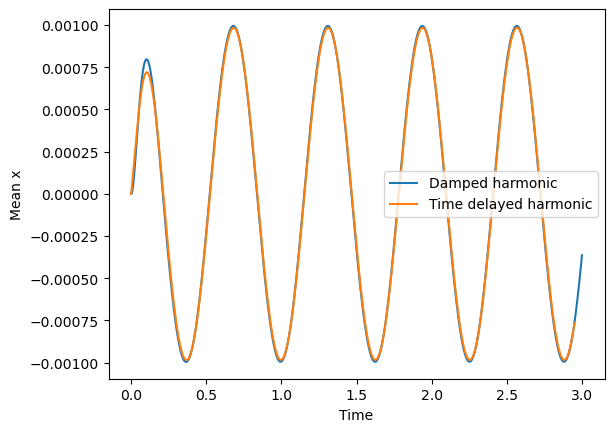

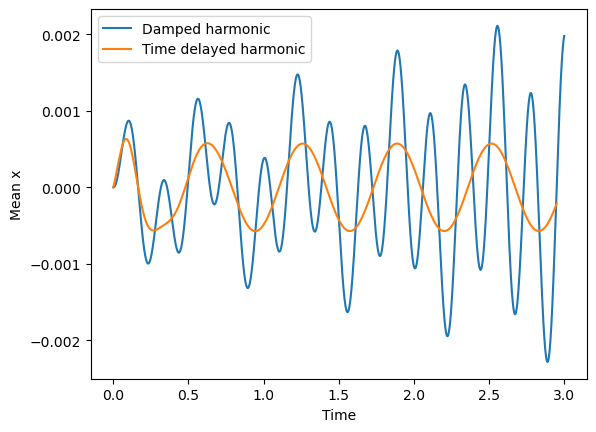

In [26]:

dt = 1e-3
tau = 0.05
gamma_d = 1

for k_d,label in zip([10,20],['low','high']):
    f = k 
    gamma = abs(gamma_d - k_d * tau) 
    m = (1/2 *k_d*  tau**2)
    k = k_d 

    F = lambda i: 0.01*np.cos(f*i)
    x0 = 0
    max_t = 3

    tdh             = time_delayed_harmonic(max_t = max_t,k = k_d, tau = tau, gamma = gamma_d, F = F, dt = dt, x0 = x0)
    #odh             = time_delaid_harmonic(max_t = max_t,k = k, tau = 0, F = F, dt = dt, x0 = x0)
    damped_harm_pos = damped_harmonic_oszillator(max_t = max_t, k = k,m = m, gamma = gamma, F = F,dt=dt, x0 = x0)

    t = torch.linspace(0, max_t, len(damped_harm_pos))
    print(label)
    print(m,gamma)
    print(f*tau)
    plt.figure()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.plot(t, damped_harm_pos, label='Damped harmonic')
    plt.plot(t[:len(tdh)],tdh, label='Time delayed harmonic')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Mean x')

    if save_run:
        plt.savefig(pic_path/'lowfreqdriving.pdf')

## Fixed frequency approx

In [27]:
np.pi/2 * 1/tau

31.41592653589793

mass 0.022984884706593014 gamma 0.1585290151921035
1.0


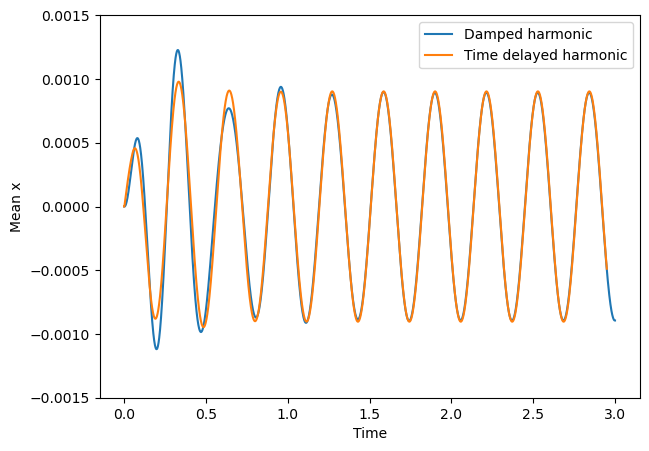

In [28]:

dt = 1e-3
tau = 0.05
k_d = 20

f = k_d

gamma_d = 1


gamma = abs(gamma_d - k_d/f * np.sin(f*tau) )
m = k_d/f**2 * ( 1 -np.cos(f* tau) )
k = k_d 

F = lambda i: 0.01*np.cos(f*i)
x0 = 0
max_t = 3

tdh             = time_delayed_harmonic(max_t = max_t,k = k_d, tau = tau, gamma = gamma_d, F = F, dt = dt, x0 = x0)
#odh             = time_delaid_harmonic(max_t = max_t,k = k, tau = 0, F = F, dt = dt, x0 = x0)
damped_harm_pos = damped_harmonic_oszillator(max_t = max_t, k = k,m = m, gamma = gamma, F = F,dt=dt, x0 = x0)

t = torch.linspace(0, max_t, len(damped_harm_pos))

print('mass',m,'gamma',gamma)
print(f*tau)
plt.plot(t, damped_harm_pos, label='Damped harmonic')
plt.plot(t[:len(tdh)],tdh, label='Time delayed harmonic')
plt.legend()
plt.ylim(-1.5e-3,1.5e-3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xlabel('Time')
plt.ylabel('Mean x')
if save_run:
    plt.savefig(pic_path/'fixedfreqdriving.pdf')

# Analytisch

## First Approx

In [29]:
max_t =2
tau = 0.1
k = 10


w = k

def get_phi(alpha):
    return np.arccos((1-k*tau/2)*np.exp(alpha*3/2*tau)) - w * 3/2 *tau
#get_phi(0)

In [30]:
def eq1(alpha):
    return k-np.exp(-alpha*3/2*tau)*(alpha*np.cos(w*3/2*tau+get_phi(alpha))+w*np.sin(w*3/2*tau+get_phi(alpha)))

In [31]:
alp = get_zero(eq1,-3,3)
phi = get_phi(alp)

In [32]:
alp,phi

(-1.012012012012012, -0.37323049300392896)

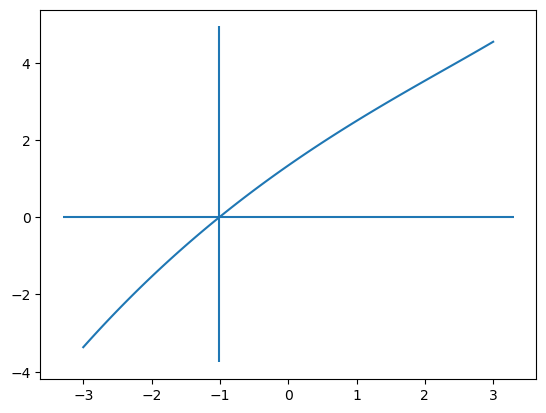

In [33]:
alpha = np.linspace(-3,3,100)
eq1_data = eq1(alpha)
plt.plot(alpha,eq1_data)
plt.hlines(0,*plt.xlim())
plt.vlines(alp,*plt.ylim())

In [34]:
damped_harmonic(phi,alp,w,1)

-2.695197451064992

In [35]:
k*tau

1.0

In [36]:
phi, alp, w

(-0.37323049300392896, -1.012012012012012, 10)

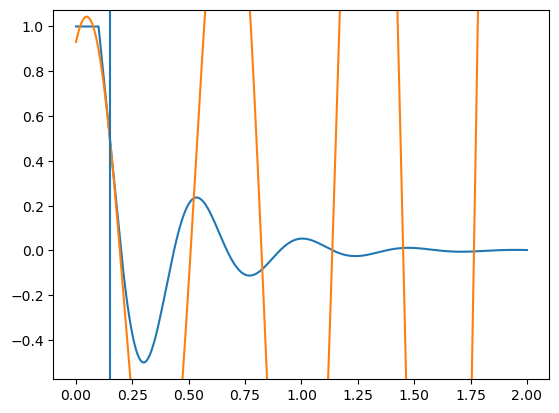

In [37]:
ts = np.linspace(0,max_t,6999)
l_ana = [damped_harmonic(phi,alp,w,o) for o in ts]
l_data = my_fpc.l(k,tau,ts)
plt.plot(ts, l_data)
plt.ylim(*plt.ylim())
plt.plot(ts,l_ana)
plt.vlines(3/2*tau,*plt.ylim())

## Second Approx

In [38]:
c1 = 1- k * 3/2 * tau + k**2*tau**2/8
c2 = -k+k**2/2*tau
c3 = k**2/2
def get_w(alpha):
    return np.sqrt(3*alpha**2-2*alpha*c2/c1-2*c3/c1)

def get_phi(alpha,t1):
    return np.arccos(c1*np.exp(alpha*t1)) - get_w(alpha) * t1

In [39]:
def eq2(alpha, t1=5/2*tau):
    phi = get_phi(alpha,t1)
    w = get_w(alpha)
    return -c2-np.exp(-alpha*t1)*(alpha*np.cos(w*t1+phi)+w*np.sin(w*t1+phi))

In [40]:
alp = get_zero(eq2,-5,5)
w = get_w(alp)
phi = get_phi(alp,5/2*tau)
alp,w,phi

/tmp/ipykernel_8670/97021390.py:8: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(c1*np.exp(alpha*t1)) - get_w(alpha) * t1


(2.4074074074074074, 14.827540830434064, -1.3820874703216055)

/tmp/ipykernel_8670/97021390.py:8: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(c1*np.exp(alpha*t1)) - get_w(alpha) * t1


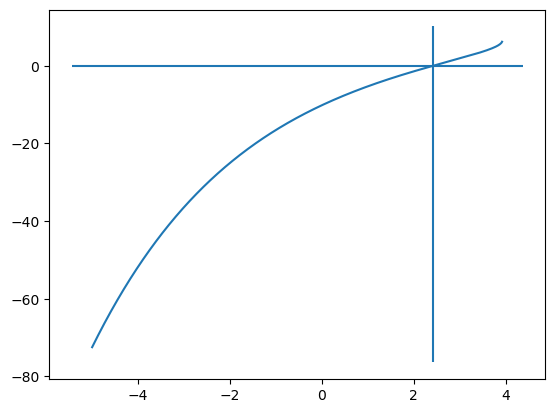

In [41]:
alpha = np.linspace(-5,5,1000)
eq2_data = eq2(alpha)
plt.plot(alpha,eq2_data)
plt.hlines(0,*plt.xlim())
if alp:
    plt.vlines(alp,*plt.ylim())

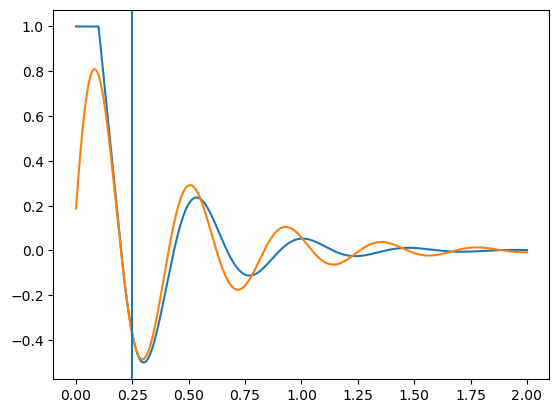

In [42]:
#plt.figure(figsize=(15,10))
ts = np.linspace(0,max_t,6999)
l_ana = [damped_harmonic(phi,alp,w,o) for o in ts]
l_data = my_fpc.l(k,tau,ts, max_p = max_p)
plt.plot(ts, l_data)
plt.ylim(*plt.ylim())
plt.plot(ts,l_ana)
plt.vlines(5/2*tau,*plt.ylim())

## Third order for any t

In [43]:
print(k,tau)

10 0.1


## Third order

In [44]:
res = []
for t1 in np.linspace(0.5,2,1001):
    res.append(get_ham_damp_par(t1,tau,k,))
res = np.array(res)

In [45]:
get_approx_freq(tau,k)

13.086765872606097

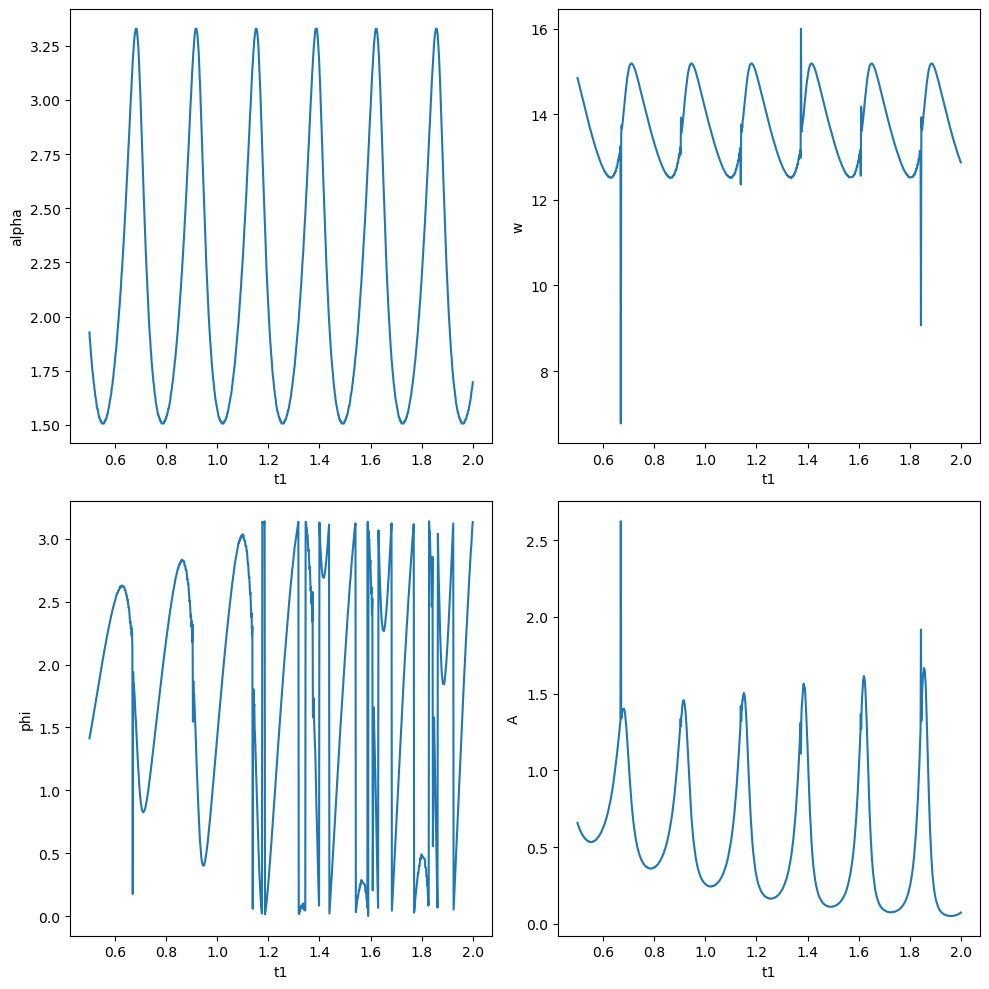

In [46]:
t1,alp,w,phi,A = res.T
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].plot(t1,alp)
axs[0,0].set_xlabel("t1")
axs[0,0].set_ylabel("alpha")

axs[0,1].plot(t1,w)
axs[0,1].set_xlabel("t1")
axs[0,1].set_ylabel("w")

axs[1,0].plot(t1,phi)
axs[1,0].set_xlabel("t1")
axs[1,0].set_ylabel("phi")

axs[1,1].plot(t1,np.abs(A))
axs[1,1].set_xlabel("t1")
axs[1,1].set_ylabel("A")

fig.tight_layout()
#fig.suptitle(f'Constant Force F = {F}')
#if save_run:
#    plt.savefig(pic_path/'.pdf')

In [47]:
# alphas = np.linspace(-2e-3,2e-3)
# plt.plot(alphas, eq_alpha(alphas))
# plt.hlines(0,*plt.xlim())
# plt.vlines(alp,*plt.ylim())

In [48]:
# def get_w_2(a):
#     return np.sqrt(1/(-4*a*c1+c2)*(-4*a**3*c1+3*a**2*c2-6*c4))
# get_w(alp), get_w_2(alp)

1 1.566566566566567 14.109220453180999 1.4286458273710014 -0.25746760814638764


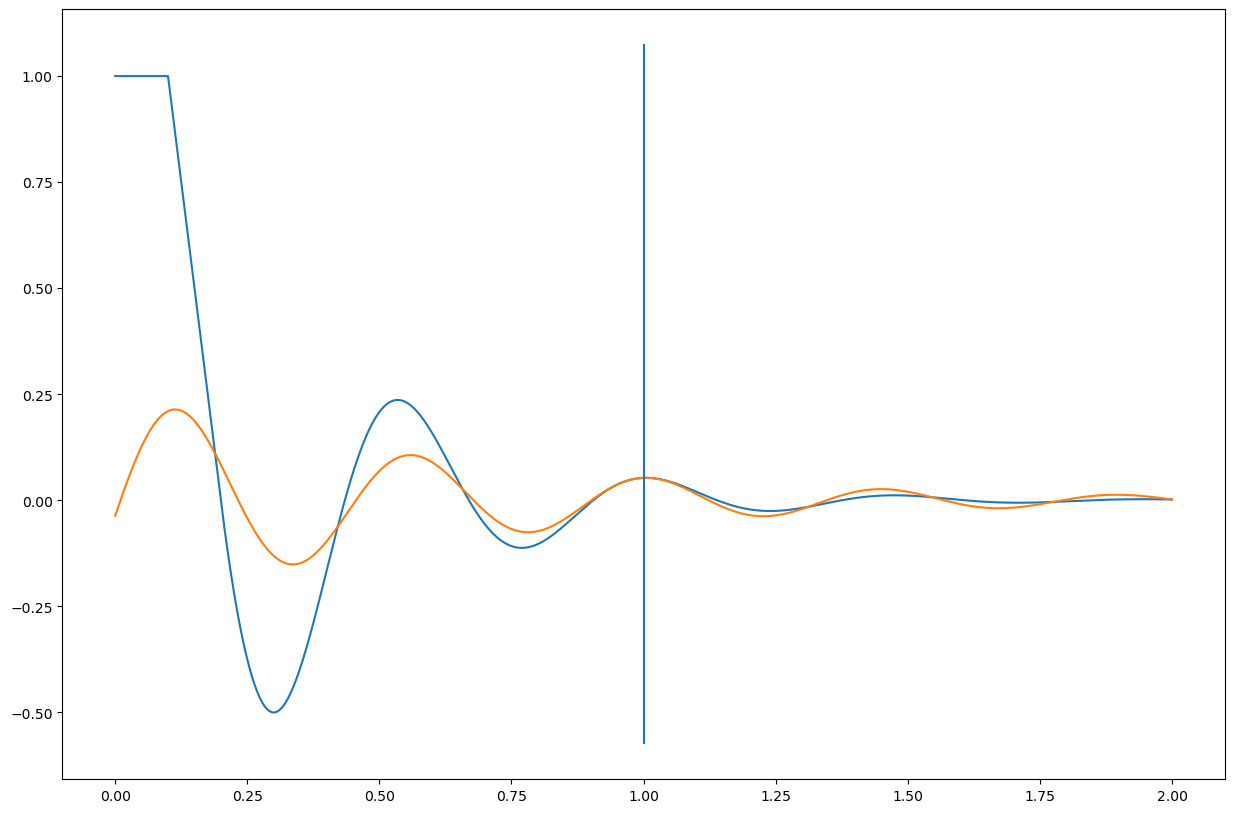

In [49]:
t1,alp,w,phi,A = get_ham_damp_par(1,tau,k)
print(t1,alp,w,phi,A)
plt.figure(figsize=(15,10))
ts = np.linspace(0,max_t,6999)
l_ana = [damped_harmonic(phi,alp,w,o,A) for o in ts]
l_data = my_fpc.l(k,tau,ts, max_p = 40)
plt.plot(ts, l_data)
#plt.ylim(*plt.ylim())
#plt.plot(ts,np.exp(-alp*ts))
#plt.plot(ts, np.cos(w*ts-phi))
plt.plot(ts,l_ana)
plt.vlines(t1,*plt.ylim())

# Lambert W funktion

In [50]:
w = 10
tau = 0.1
z = -w * tau
for i in range(10):
    w = lambertw(z,i)
    l = w/tau
    print(l.real, l.imag)
lambertw(z)

-3.181315052047642 13.372357014306893
-20.62277729598284 75.88631178472512
-26.531919740386975 139.49208334533213
-30.20239708164501 202.72457641615222
-32.87768611544094 265.80471499359146
-34.985152121541034 328.80721480068917
-36.724500687098185 391.76440021735243
-38.20554307813677 454.6926540371086
-39.49522742422529 517.601220040207
-40.637417027918296 580.495734344775


(-0.3181315052047642+1.3372357014306893j)

0.022984884706593014 0.1585290151921035
0.75


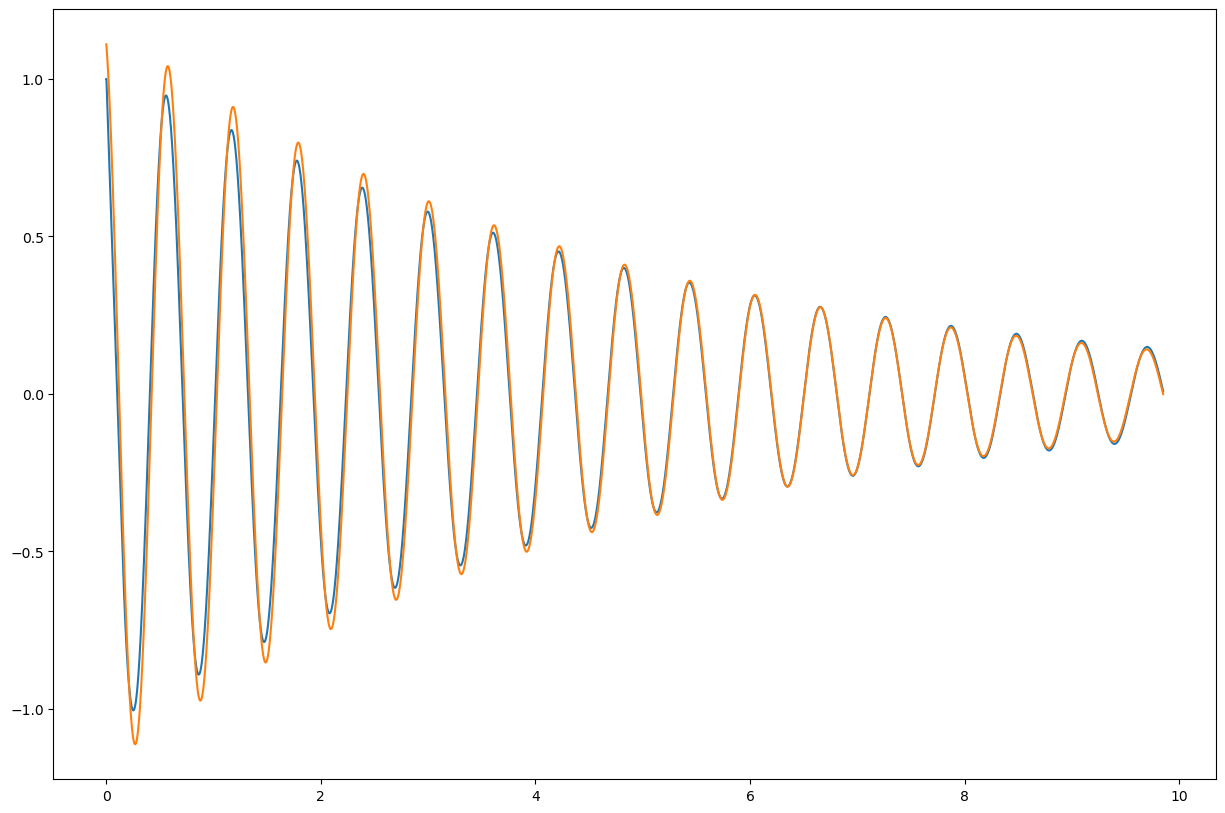

In [51]:
f = 5
dt = 1e-3
tau = 0.15
k_d = 10
gamma_d = 1
max_t = 10


F = lambda i: 0.00*np.cos(f*i)
x0 = 1



z = -k_d * tau
w = lambertw(z)
l = w/tau



tdh             = time_delayed_harmonic(max_t = max_t,k = k_d, tau = tau, gamma = gamma_d, F = F, dt = dt, x0 = x0)
#odh             = time_delaid_harmonic(max_t = max_t,k = k, tau = 0, F = F, dt = dt, x0 = x0)
t = torch.linspace(0,max_t-tau, len(tdh))
y = (l.real*t).exp()*(t*l.imag+0.11*np.pi).cos()*1.18

print(m,gamma)
print(f*tau)
plt.figure(figsize=(15,10))
plt.plot(t,tdh)
plt.plot(t,y)
#plt.legend()
#plt.ylim(-0.00002,0.00002)

In [52]:
l.real

-0.21855823943715016